# 木構造を python で記述する

やり方はいくつかあると思うけど，
- 自分ですべて実装する: メリットとして構造の理解は進むけど，描画したりするのは結構めんどうかも
- なんらかのパッケージ: メリットとして，描画とかで悩まないで住むけど，木構造に特化したというものもそれほどない
ということで，悩んだけど，描画系とかのメリットをとって，ここでは ``networkx`` をつかうこととする．

Networkx に関しては，ここらへんで

- 本家 https://networkx.org/


どうせ，あとでグラフ構造の記述で使うことになるし

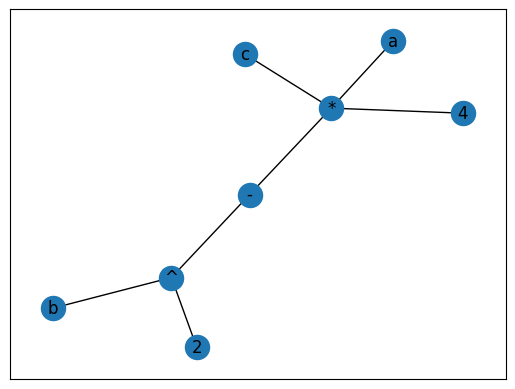

In [12]:
import networkx as nx
import matplotlib.pylab as plt

# b^2 - 4 * a * c という式木を作る
G = nx.Graph()
G.add_nodes_from(['-', '^', '*', 'b', '2', '4', 'a', 'c'])

G.add_edges_from([['-', '^'], ['-', '*']])
G.add_edges_from([['^', 'b'], ['^', '2']])
G.add_edges_from([['*', '4'], ['*', 'a'], ['*', 'c']])

nx.draw_networkx(G)

